In [1]:
import pandas as pd

In [8]:
train_data = pd.read_csv(r"C:\Users\Ajay Mulgir\Encryptix\Task 2-Sales Prediction using python\advertising.csv")

In [9]:
train_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
train_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
train_data.shape

(200, 4)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
train_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

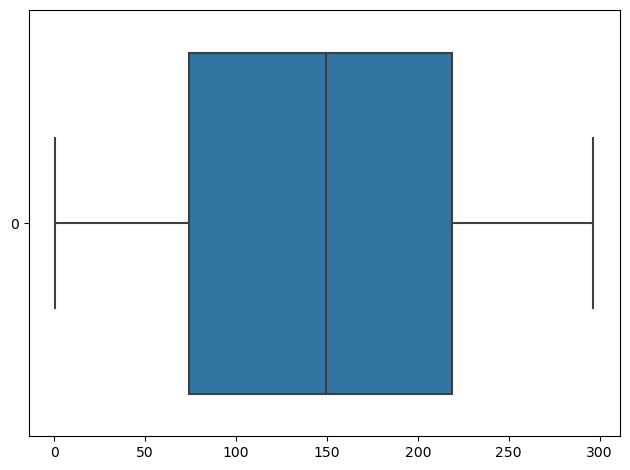

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plot1=sns.boxplot(train_data["TV"],orient="h")
plt.tight_layout()

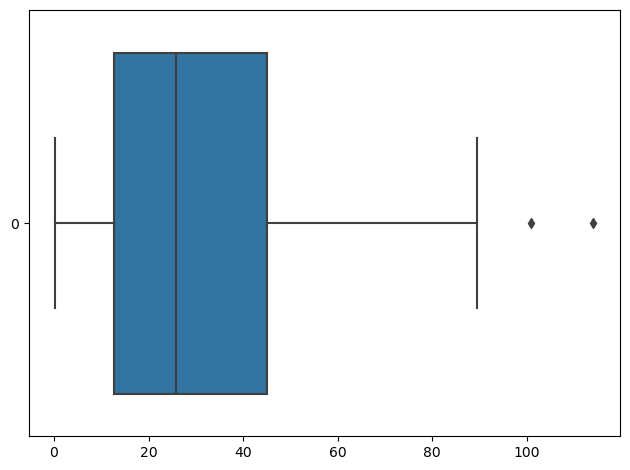

In [27]:
plot2=sns.boxplot(train_data["Newspaper"],orient="h")
plt.tight_layout() 

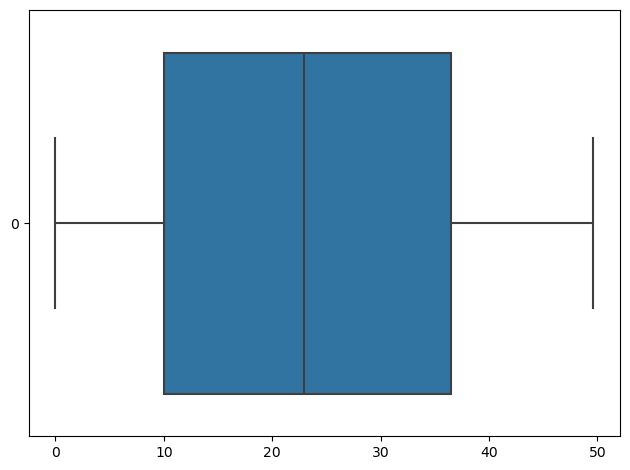

In [28]:
plot3=sns.boxplot(train_data["Radio"],orient="h")
plt.tight_layout()

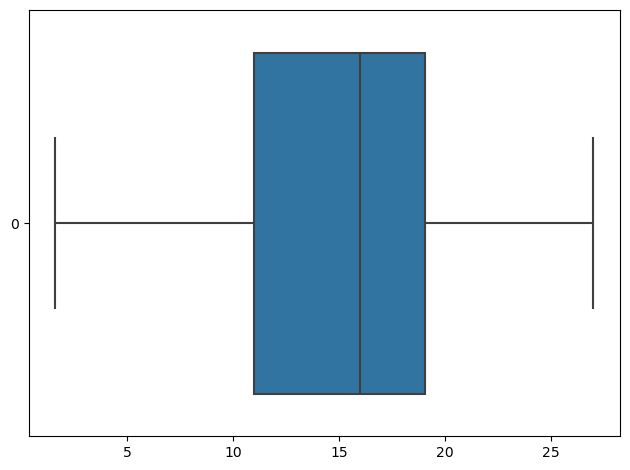

In [29]:
plot4=sns.boxplot(train_data["Sales"],orient="h")
plt.tight_layout()

<Axes: >

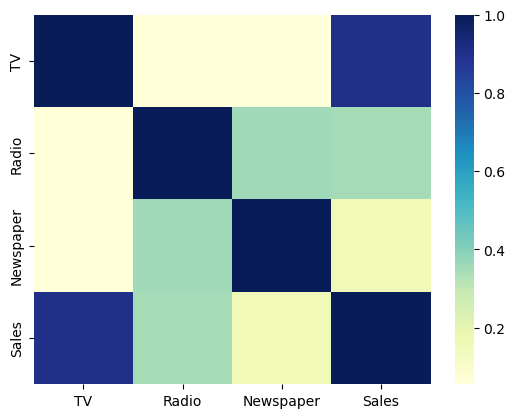

In [41]:
corr_map= sns.heatmap(train_data.corr(),cmap="YlGnBu")
corr_map

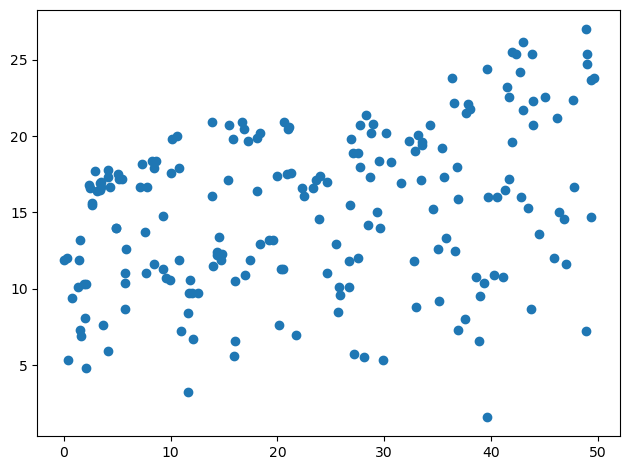

In [36]:
Sca_plot1= plt.scatter(train_data["Radio"], train_data["Sales"])
plt.tight_layout()

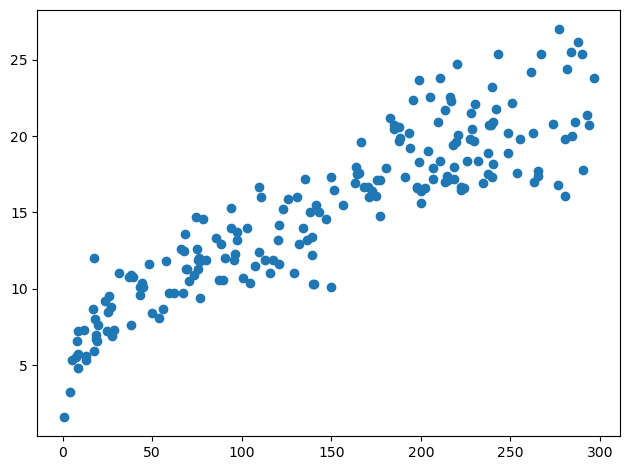

In [37]:
Sca_plot2= plt.scatter(train_data["TV"], train_data["Sales"])
plt.tight_layout()

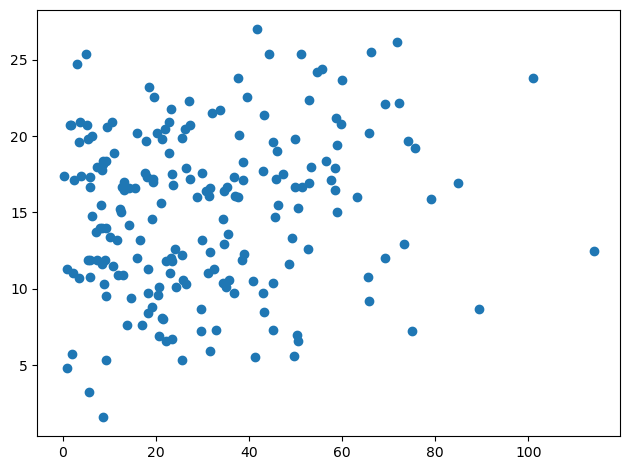

In [38]:
Sca_plot3= plt.scatter(train_data["Newspaper"], train_data["Sales"])
plt.tight_layout()

In [44]:
X=train_data["TV"]
Y=train_data["Sales"]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
X_train.size

160

In [50]:
X_train.head()

137    273.7
163    163.5
111    241.7
123    123.1
109    255.4
Name: TV, dtype: float64

In [55]:
Y_train

137    20.8
163    18.0
111    21.8
123    15.2
109    19.8
       ... 
43     17.9
22      5.6
72      8.8
15     22.4
168    17.1
Name: Sales, Length: 160, dtype: float64

In [59]:
type(X_train)

pandas.core.series.Series

In [60]:
training=pd.concat([X_train, Y_train], axis=1)

In [70]:
testing=pd.concat([X_val, Y_val], axis=1)

In [61]:
training.head()

,TV,Sales
137,273.7,20.8
163,163.5,18.0
111,241.7,21.8
123,123.1,15.2
109,255.4,19.8


In [62]:
data,target =  training[["TV"]], training["Sales"]

In [63]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

In [64]:
weight_line = linear_regression.coef_[0]

In [65]:
intercept_line=linear_regression.intercept_

In [66]:
print(weight_line,intercept_line)

0.05838584888737484 6.57452093430827


In [75]:
import numpy as np

TV_price_range = testing["TV"]
pred_Sales = (
    weight_line * TV_price_range + intercept_line
)

In [76]:
pred_Sales

112    16.832915
29     10.696562
182     9.855806
199    20.125876
193    16.313281
85     17.854667
10     10.433826
54     21.912483
115    10.959298
35     23.547287
12      7.964104
92     19.285120
13     12.267141
126     7.029931
174    19.559534
2       7.578758
44      8.040006
3      15.419977
113    18.812195
14     18.491073
23     19.904010
25     21.924161
6       9.931707
134     8.728959
165    20.266002
173    16.406698
45     16.797883
65     10.603145
48     19.839786
122    19.652951
178    22.729885
64     14.228906
9      18.240014
57     14.526674
78      6.889805
71     12.985287
128    19.436923
176    21.077566
131    22.058448
53     17.235777
Name: TV, dtype: float64

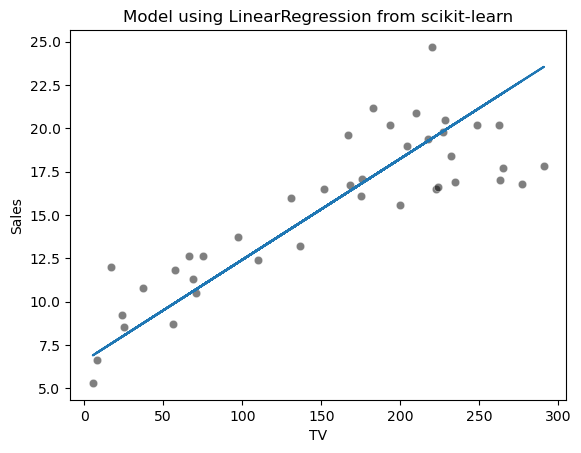

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=testing["TV"], y=testing["Sales"], color="black", alpha=0.5)
plt.plot(TV_price_range, pred_Sales)
_ = plt.title("Model using LinearRegression from scikit-learn")
